In [0]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
'''


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras import regularizers
from keras import backend as K
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras.layers import advanced_activations
from keras.layers import Activation, Dense

import os



Using TensorFlow backend.


In [0]:

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train.shape[1:])


170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(32, 32, 3)


10
0
1
2
3
4
5
6
7
8
9


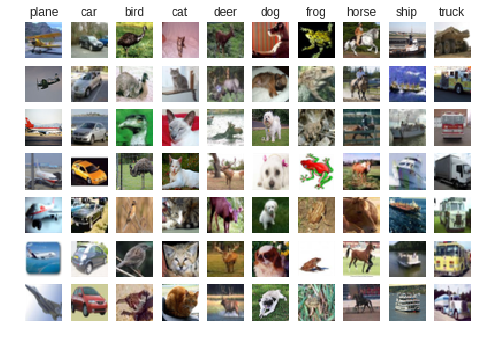

In [0]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
print(num_classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    print(y)
    idxs = np.flatnonzero(y_train == y)  # returns indices of the non-zero elements as an index array
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx) #Create subplot of Rows =samples_per_class ,Columns =num_classes and select plt_idx plot
        plt.imshow(x_train[idx].astype('uint8'))# Show image
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)


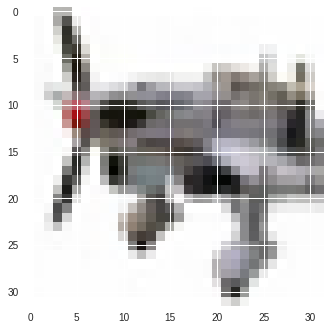

In [0]:
plane = x_train[np.flatnonzero(y_train == 0)]
car = x_train[np.flatnonzero(y_train == 1)]
bird = x_train[np.flatnonzero(y_train == 2)]
cat = x_train[np.flatnonzero(y_train == 3)]
deer = x_train[np.flatnonzero(y_train == 4)]
dog = x_train[np.flatnonzero(y_train == 5)]
frog = x_train[np.flatnonzero(y_train == 6)]
horse = x_train[np.flatnonzero(y_train == 7)]
ship = x_train[np.flatnonzero(y_train == 8)]
truck = x_train[np.flatnonzero(y_train == 9)]

plane_test = x_test[np.flatnonzero(y_test == 0)]
car_test = x_test[np.flatnonzero(y_test == 1)]
bird_test = x_test[np.flatnonzero(y_test == 2)]
cat_test = x_test[np.flatnonzero(y_test == 3)]
deer_test = x_test[np.flatnonzero(y_test == 4)]
dog_test = x_test[np.flatnonzero(y_test == 5)]
frog_test = x_test[np.flatnonzero(y_test == 6)]
horse_test = x_test[np.flatnonzero(y_test == 7)]
ship_test = x_test[np.flatnonzero(y_test == 8)]
truck_test = x_test[np.flatnonzero(y_test== 9)]


print(plane.shape)    

a=[0,1,2,3,4,5,6,7,8,9]
b=[plane,car,bird,cat,deer,dog,frog,horse,ship,truck]
data = dict(zip(a,b))

a=[0,1,2,3,4,5,6,7,8,9]
b=[plane_test,car_test,bird_test,cat_test,deer_test,dog_test,frog_test,horse_test,ship_test,truck_test]
data_test = dict(zip(a,b))

print(data[0].shape)    
 
a = data[0]
print(a.shape)    

plt.imshow(a[3].astype('uint8'))# Show image
plt.show()

In [0]:
# Convert class vectors to binary class matrices.
print(y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)
# print(y_test)
print(y_train.shape)

print(y_train[0].shape)


(50000, 1)
(50000, 10)
(10,)


In [0]:
# l2 = regularizers.l2(0.003)
# del model

weight_decay = 4e-4

model = Sequential()

model.add(Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay),input_shape=x_train.shape[1:],name ='my_layer',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(weight_decay),activation = 'relu',padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay),name ='my_layer2'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), activation = 'relu'))
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
# model.add(BatchNormalization())
model.add(Activation('softmax'))




In [0]:
print(model.summary())
# print("W shape : ", outputs[0].shape)
acc=[]
val_loss =[]
loss =[]
val_acc=[]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
my_layer2 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
__________

In [0]:
# initiate RMSprop optimizer
l= 0.0001
opt = keras.optimizers.Adam(lr=l, decay=1e-5) # 0.0001 ,1e-6

    # Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])





In [0]:
batch_size = 128
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

for i in range(45) : #30
  indices = np.full(50000, False, bool)

  randices = np.random.choice(np.arange(indices.shape[0]), 4000, replace = False)
  indices[randices] = True
  
  x_val = x_train[randices]
  y_val = y_train[randices]

  X_train = x_train[~indices]
  Y_train = y_train[~indices]

  X_train = X_train.astype('float32')
  X_train /= 255

  x_val = x_val.astype('float32')
  x_val /= 255


  if not data_augmentation:
#       print('Not using data augmentation.')
      history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,shuffle=True ,
                        validation_data=(x_val, y_val))

  else:
      print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False)  # randomly flip images


#     Compute quantities required for feature-wise normalization
#     (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    
      history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),epochs=epochs,steps_per_epoch=50000/batch_size ,workers=4)
    
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])
  acc.append(history.history['acc'])
  val_acc.append(history.history['val_acc'])
  
#   if (i+1) % 18 == 0:
  if i == 25 or i == 38 or i == 48 or i == 55 :
    print("Reduced Learning Rate")
    l/=2
    opt = keras.optimizers.Adam(lr=l, decay=1e-6)
    # 0.0001 ,1e-6 , lr = l/4 for every (i+1) % 9 == 0

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])



Train on 46000 samples, validate on 4000 samples
Epoch 1/1
40064/46000 [=========================>....] - ETA: 5s - loss: 2.1775 - acc: 0.310846000/46000 [==============================] - 42s 914us/step - loss: 2.1361 - acc: 0.3209 - val_loss: 1.9292 - val_acc: 0.3895
Train on 46000 samples, validate on 4000 samples
Epoch 1/1
45312/46000 [============================>.] - ETA: 0s - loss: 1.7115 - acc: 0.443946000/46000 [==============================] - 39s 855us/step - loss: 1.7102 - acc: 0.4446 - val_loss: 1.6131 - val_acc: 0.4868
Train on 46000 samples, validate on 4000 samples
Epoch 1/1
46000/46000 [==============================] - 40s 860us/step - loss: 1.5347 - acc: 0.5089 - val_loss: 1.4569 - val_acc: 0.5420
Train on 46000 samples, validate on 4000 samples
Epoch 1/1
  512/46000 [..............................] - ETA: 38s - loss: 1.4688 - acc: 0.533246000/46000 [==============================] - 40s 860us/step - loss: 1.4043 - acc: 0.5521 - val_loss: 1.3016 - val_acc: 0.5962
Tr

Train on 46000 samples, validate on 4000 samples
Epoch 1/1
46000/46000 [==============================] - 40s 861us/step - loss: 0.3956 - acc: 0.9123 - val_loss: 0.2924 - val_acc: 0.9595
Train on 46000 samples, validate on 4000 samples
Epoch 1/1
18816/46000 [===========>..................] - ETA: 22s - loss: 0.3895 - acc: 0.912446000/46000 [==============================] - 40s 861us/step - loss: 0.3944 - acc: 0.9111 - val_loss: 0.2769 - val_acc: 0.9640
Train on 46000 samples, validate on 4000 samples
Epoch 1/1
38656/46000 [========================>.....] - ETA: 6s - loss: 0.3842 - acc: 0.915146000/46000 [==============================] - 40s 861us/step - loss: 0.3860 - acc: 0.9137 - val_loss: 0.2689 - val_acc: 0.9673
Train on 46000 samples, validate on 4000 samples
Epoch 1/1
44928/46000 [============================>.] - ETA: 0s - loss: 0.3740 - acc: 0.917646000/46000 [==============================] - 40s 860us/step - loss: 0.3735 - acc: 0.9179 - val_loss: 0.2647 - val_acc: 0.9693
Tr

In [0]:
X_test = x_test
X_test = X_test.astype('float32')
X_test /= 255
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])  

10000/10000 [==============================] - 4s 358us/step
Test loss: 0.7949056292533875
Test accuracy: 0.7876


In [0]:
model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation = 'relu',padding='same',input_shape=x_train.shape[1:],name ='my_layer',weights=model.layers[0].get_weights()))
# model2.add(BatchNormalization())
model2.add(Conv2D(16, (3, 3), activation = 'relu',padding='same', weights=model.layers[2].get_weights()))
# model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), activation = 'relu', weights=model.layers[4].get_weights()))
# model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation = 'relu', weights=model.layers[6].get_weights()))
# model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation = 'relu',padding='same', weights=model.layers[8].get_weights()))
# model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation = 'relu',padding='same', weights=model.layers[10].get_weights()))

# model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), activation = 'relu',padding='same', weights=model.layers[14].get_weights()))
# model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation = 'relu',padding='same', weights=model.layers[16].get_weights()))
# model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation = 'relu',padding='same', weights=model.layers[18].get_weights()))
# model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation = 'relu',weights=model.layers[20].get_weights()))

model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.3))

model2.add(Flatten())

In [0]:
output = model2.predict(data[0]/255, verbose=0)
print(output.shape)

(5000, 2304)


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


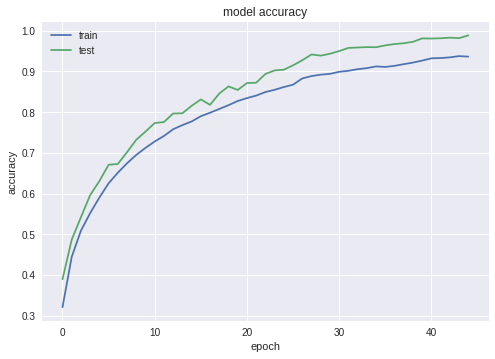

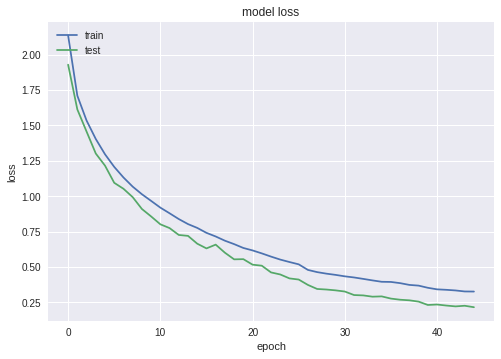

In [0]:
print(history.history.keys())
# summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])

plt.plot(acc)
plt.plot(val_acc)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.plot(loss)
plt.plot(val_loss)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(64, 6, 6)
64


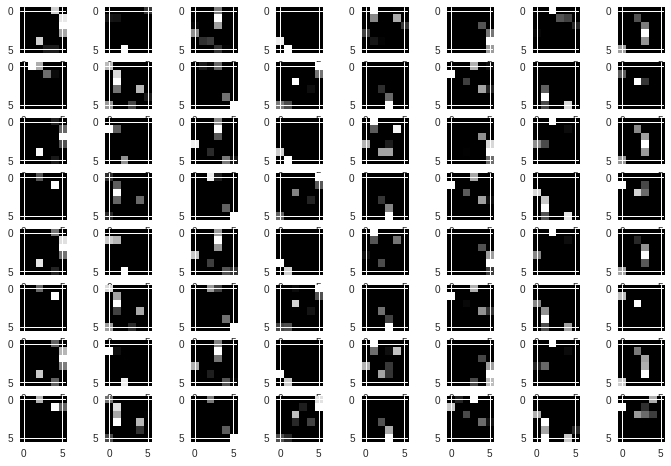

In [0]:
# Specify the layer to want to visualize

temp=output[3]

temp = temp.reshape(64, 6, 6)
# temp = np.transpose(temp, (2, 0, 1))
print(temp.shape)
n = temp.shape[0]
# print(cn)
n = int(np.ceil(np.sqrt(n)))

print(len(temp))

t_min, t_max = np.min(temp), np.max(temp)

# wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
# plt.imshow(wimg.astype('uint8'))
# plt.axis('off')
    
# Visualization of each filter of the layer
fig = plt.figure(figsize=(12,8))
for i in range(len(temp)):
#     timg = 255.0 * (temp[i, :, :].squeeze() - t_min) / (t_max - t_min)
    ax = fig.add_subplot(n,n,i+1)
#     ax.imshow(timg.astype('uint8'), cmap='gray')
    ax.imshow(temp[i], cmap='gray')


# layer_to_visualize(output[1])

In [0]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


In [0]:
    model1 = load_model(model_path)
    
    opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
    model1.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    X1_train = data[9]
    Y1_train = np.full((5000,1 ), 9)
    Y1_test = np.full((1000,1 ), 9)
    X1_test = data_test[9]
    num_classes = 10
    print(Y1_train.shape)
   
    # Convert class vectors to binary class matrices.
    
    Y1_train = keras.utils.to_categorical(Y1_train, num_classes)
    Y1_test = keras.utils.to_categorical(Y1_test, num_classes)
    print(Y1_test.shape)
    print(Y1_test[0].shape)
   
    X1_train = X1_train.astype('float32')
    X1_test = X1_test.astype('float32')
    print(Y1_test[0])
#     plt.imshow(X_train[0].astype('uint8'))# Show image
#     plt.show()
    X1_train /= 255
    X1_test /= 255
    print('Test data', X1_test.shape)

    scores = model1.evaluate(X1_test, Y1_test, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])

#     if not data_augmentation:
#         print('Not using data augmentation.')
#         model1.fit(X1_test, Y1_test,batch_size=batch_size,epochs=1)#,shuffle=True)

(5000, 1)
(1000, 10)
(10,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Test data (1000, 32, 32, 3)
1000/1000 [==============================] - 5s 5ms/step
Test loss: 0.6598956806659698
Test accuracy: 0.842


In [0]:
features = {}

for i in range(len(classes)) :
    
    X_train = data[i]
    X_test = data_test[i]
    
    num_classes = 10
    # Convert class vectors to binary class matrices.
    
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    
    features[i]= model2.predict(X_train, verbose=0)
    print(features[i].shape)

(5000, 2304)
(5000, 2304)
(5000, 2304)
(5000, 2304)
(5000, 2304)
(5000, 2304)
(5000, 2304)
(5000, 2304)
(5000, 2304)
(5000, 2304)


In [0]:
print (features[0].shape)

(5000, 2304)
